- Of that mobile traffic, what % came from social media?
- What percent of donation page traffic came from social media
- Conversion rate for all campaign types (complete donation after landing anywhere - donation page, team fundraising page, etc.)


- [offline] Percentage of donations made via cash
- [offline] Percentage of donations made via check
- Overall online versus offline percentage

- Median AND average SMS donation amount

In [142]:
import pandas as pd
import sys
sys.path.insert(1, '../../scripts/')
from s3_support import *
%matplotlib inline

# What percent of donation page traffic came from a mobile device?

_source: google analytics_

Not sure if this is relevant but it is my understanding that since the iPad OS update in late 2019 the iPad version of Safari reports itself as a desktop browser so iPad traffic is reported as "desktop" rather than "tablet".

In [143]:
q = '''select 
            sum(views) as pageviews, 
            date_trunc('month', date) as month, 
            devicecategory
        from googleanalytics_traffic
            group by month, devicecategory'''
traffic_device = redshift_query_read(q)

In [144]:
traffic_device_pvt = traffic_device.pivot(columns='devicecategory', values='pageviews', index='month').reset_index()

traffic_device_pvt['all'] = traffic_device_pvt['desktop'] + traffic_device_pvt['mobile'] + traffic_device_pvt['tablet']
for c in ['desktop', 'mobile', 'tablet']:
    traffic_device_pvt["{}_percentage".format(c)] = traffic_device_pvt[c] / traffic_device_pvt['all']

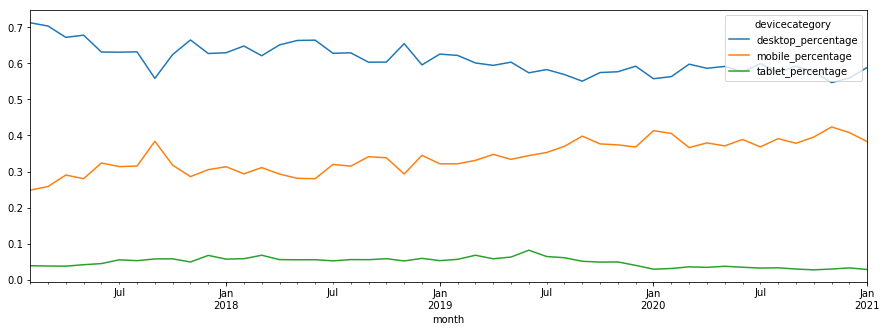

In [145]:
traffic_device_pvt[['month', 'desktop_percentage', 'mobile_percentage', 'tablet_percentage']].plot(x='month', figsize=(15,5))

In [146]:
print("| Month | Desktop traffic | Mobile traffic | Tablet traffic |")
print("|----|----|-----|-----|")
for _, r in traffic_device_pvt[traffic_device_pvt['month'].dt.year>=2019].sort_values('month', ascending=True).iterrows():
    month = r['month']
    traffic_dsk_perc = r['desktop_percentage'] * 100.
    traffic_mbl_perc = r['mobile_percentage'] * 100.
    traffic_tblt_perc = r['tablet_percentage'] * 100.
    print("| {:%m-%Y} | {:.2f}% | {:.2f}% | {:.2f}% |".format(month, traffic_dsk_perc, traffic_mbl_perc, traffic_tblt_perc))

| Month | Desktop traffic | Mobile traffic | Tablet traffic |
|----|----|-----|-----|
| 01-2019 | 62.55% | 32.14% | 5.31% |
| 02-2019 | 62.19% | 32.14% | 5.67% |
| 03-2019 | 60.10% | 33.10% | 6.80% |
| 04-2019 | 59.43% | 34.75% | 5.82% |
| 05-2019 | 60.31% | 33.38% | 6.31% |
| 06-2019 | 57.37% | 34.42% | 8.20% |
| 07-2019 | 58.26% | 35.28% | 6.45% |
| 08-2019 | 56.89% | 37.00% | 6.11% |
| 09-2019 | 55.05% | 39.82% | 5.14% |
| 10-2019 | 57.44% | 37.66% | 4.90% |
| 11-2019 | 57.66% | 37.39% | 4.95% |
| 12-2019 | 59.20% | 36.81% | 3.99% |
| 01-2020 | 55.73% | 41.33% | 2.94% |
| 02-2020 | 56.31% | 40.56% | 3.13% |
| 03-2020 | 59.76% | 36.64% | 3.60% |
| 04-2020 | 58.62% | 37.94% | 3.44% |
| 05-2020 | 59.14% | 37.12% | 3.75% |
| 06-2020 | 57.62% | 38.90% | 3.48% |
| 07-2020 | 59.92% | 36.83% | 3.25% |
| 08-2020 | 57.55% | 39.13% | 3.32% |
| 09-2020 | 59.19% | 37.83% | 2.98% |
| 10-2020 | 57.68% | 39.56% | 2.76% |
| 11-2020 | 54.65% | 42.36% | 2.98% |
| 12-2020 | 55.90% | 40.80% | 3.30% |
| 

| Month | Desktop traffic | Mobile traffic | Tablet traffic |
|----|----|-----|-----|
| 01-2019 | 62.55% | 32.14% | 5.31% |
| 02-2019 | 62.19% | 32.14% | 5.67% |
| 03-2019 | 60.10% | 33.10% | 6.80% |
| 04-2019 | 59.43% | 34.75% | 5.82% |
| 05-2019 | 60.31% | 33.38% | 6.31% |
| 06-2019 | 57.37% | 34.42% | 8.20% |
| 07-2019 | 58.26% | 35.28% | 6.45% |
| 08-2019 | 56.89% | 37.00% | 6.11% |
| 09-2019 | 55.05% | 39.82% | 5.14% |
| 10-2019 | 57.44% | 37.66% | 4.90% |
| 11-2019 | 57.66% | 37.39% | 4.95% |
| 12-2019 | 59.20% | 36.81% | 3.99% |
| 01-2020 | 55.73% | 41.33% | 2.94% |
| 02-2020 | 56.31% | 40.56% | 3.13% |
| 03-2020 | 59.76% | 36.64% | 3.60% |
| 04-2020 | 58.62% | 37.94% | 3.44% |
| 05-2020 | 59.14% | 37.12% | 3.75% |
| 06-2020 | 57.62% | 38.90% | 3.48% |
| 07-2020 | 59.92% | 36.83% | 3.25% |
| 08-2020 | 57.55% | 39.13% | 3.32% |
| 09-2020 | 59.19% | 37.83% | 2.98% |
| 10-2020 | 57.68% | 39.56% | 2.76% |
| 11-2020 | 54.65% | 42.36% | 2.98% |
| 12-2020 | 55.90% | 40.80% | 3.30% |

# giving tuesday and year end

- What percent of annual donation volume happens from Giving Tuesday to end of the year?
- What percent of annual donation volume happens during the last three days of the year?
- What percent of annual donation volume happens during the last five days of the year?
- Total dollars given on Giving Tuesday Now (May 5)
- Total dollars given on Giving Tuesday (12/3/2019)

In [147]:
# annual percentages
q = "select sum(amount) from transactions where date>='2019-01-01' and date<'2020-01-01' and status='A' and amount!=99999999.99"
total_2019 = redshift_query_read(q)['sum'].iloc[0]
# giving tuesday to EOY
q = "select sum(amount) from transactions where date>='2019-12-03' and date<'2020-01-01' and status='A' and amount!=99999999.99"
gt_to_eoy = redshift_query_read(q)['sum'].iloc[0]
# last 3 days of year
q = "select sum(amount) from transactions where date>='2019-12-29' and date<'2020-01-01' and status='A' and amount!=99999999.99"
last_3_days = redshift_query_read(q)['sum'].iloc[0]
# last 5 days of year
q = "select sum(amount) from transactions where date>='2019-12-27' and date<'2020-01-01' and status='A' and amount!=99999999.99"
last_5_days = redshift_query_read(q)['sum'].iloc[0]

In [148]:
print("Giving Tuesday to EOY: {:.2f}%".format((gt_to_eoy / total_2019) * 100.))
print("Last 3 days of year: {:.2f}%".format((last_3_days / total_2019) * 100.))
print("Last 5 days of year: {:.2f}%".format((last_5_days / total_2019) * 100.))

Giving Tuesday to EOY: 17.64%
Last 3 days of year: 5.32%
Last 5 days of year: 6.49%


In [149]:
# total for giving tuesday
q = "select sum(amount) from transactions where date='2019-12-03' and status='A' and amount!=99999999.99"
gt_total = redshift_query_read(q)['sum'].iloc[0]
# total for giving tuesday now (may 5 2020)
q = "select sum(amount) from transactions where date='2020-05-05' and status='A' and amount!=99999999.99"
gtn_total = redshift_query_read(q)['sum'].iloc[0]

print("Giving Tuesday 2019: ${:,.2f}".format(gt_total))
print("Giving Tuesday Now: ${:,.2f}".format(gtn_total))

Giving Tuesday 2019: $3,016,915.06
Giving Tuesday Now: $2,554,977.96


# monthly totals

- DONATION VOLUME FOR EACH MONTH (dollar amount AND percentage)

In [150]:
q = '''select
            sum(amount) as volume,
            date_trunc('month', date) as month
        from transactions
            where status='A' and date>='2019-01-01' and date<'2021-01-01' and amount!=99999999.99
        group by date_trunc('month', date)'''
monthly = redshift_query_read(q)

In [151]:
total_2019 = monthly[monthly['month'].dt.year==2019]['volume'].sum()
def get_perc(x):
    if x['month'].year==2020:
        return None
    else:
        return x['volume'] / total_2019
def get_yoy(x):
    if x['month'].year==2019:
        return None
    else:
        prior = monthly[(monthly['month'].dt.year==2019)&(monthly['month'].dt.month==x['month'].month)]['volume'].iloc[0]
        return "{:.4f}".format((x['volume'] / prior))
        
monthly['percentage_year'] = monthly.apply(get_perc, axis=1)
monthly.head()

,volume,month,percentage_year
0,15201002.53,2019-11-01,0.079114
1,15966167.95,2020-02-01,NaN
2,20553473.13,2020-05-01,NaN
3,16397207.77,2019-05-01,0.085340
4,20057368.31,2020-10-01,NaN


In [152]:
print("| Month | 2019 Volume | 2020 Volume | 2019 Percentage |")
print("|----|----|----|----|")
for n in range(0, 12):
    vol_2019 = monthly[(monthly['month'].dt.year==2019)&(monthly['month'].dt.month==n+1)]['volume'].iloc[0]
    perc_2019 = monthly[(monthly['month'].dt.year==2019)&(monthly['month'].dt.month==n+1)]['percentage_year'].iloc[0]
    try:
        vol_2020 = monthly[(monthly['month'].dt.year==2020)&(monthly['month'].dt.month==n+1)]['volume'].iloc[0]
    except:
        vol_2020 = 0.
    print("| {} | \${:,.2f} | \${:,.2f} | {:.2f}% |".format(n+1, vol_2019, vol_2020, perc_2019 * 100.))

| Month | 2019 Volume | 2020 Volume | 2019 Percentage |
|----|----|----|----|
| 1 | \$10,763,733.18 | \$13,583,717.32 | 5.60% |
| 2 | \$12,210,571.59 | \$15,966,167.95 | 6.36% |
| 3 | \$14,725,113.35 | \$18,814,116.06 | 7.66% |
| 4 | \$15,688,736.94 | \$26,922,905.86 | 8.17% |
| 5 | \$16,397,207.77 | \$20,553,473.13 | 8.53% |
| 6 | \$13,362,425.45 | \$16,552,745.04 | 6.95% |
| 7 | \$11,298,414.03 | \$15,263,235.59 | 5.88% |
| 8 | \$14,318,646.32 | \$18,276,290.86 | 7.45% |
| 9 | \$15,919,153.31 | \$22,224,188.39 | 8.29% |
| 10 | \$16,730,428.52 | \$20,057,368.31 | 8.71% |
| 11 | \$15,201,002.53 | \$23,946,565.66 | 7.91% |
| 12 | \$35,525,001.01 | \$57,303,188.56 | 18.49% |


| Month | 2019 Volume | 2020 Volume | 2019 Percentage |
|----|----|----|----|
| 1 | \$10,763,733.18 | \$13,583,717.32 | 5.60% |
| 2 | \$12,210,571.59 | \$15,966,167.95 | 6.36% |
| 3 | \$14,725,113.35 | \$18,814,116.06 | 7.66% |
| 4 | \$15,688,736.94 | \$26,922,905.86 | 8.17% |
| 5 | \$16,397,207.77 | \$20,553,473.13 | 8.53% |
| 6 | \$13,362,425.45 | \$16,552,745.04 | 6.95% |
| 7 | \$11,298,414.03 | \$15,263,235.59 | 5.88% |
| 8 | \$14,318,646.32 | \$18,276,290.86 | 7.45% |
| 9 | \$15,919,153.31 | \$22,224,188.39 | 8.29% |
| 10 | \$16,730,428.52 | \$20,057,368.31 | 8.71% |
| 11 | \$15,201,002.53 | \$23,946,565.66 | 7.91% |
| 12 | \$35,525,001.01 | \$57,303,188.56 | 18.49% |

# payment method

- Percentage of donations made via credit card
- Percentage of donations made via eCheck
- Percentage of donations made via PayPal

In [153]:
q = "select sum(amount), payment_type from transactions where date>='2019-01-01' and date<'2020-01-01' and status='A' and amount!=99999999.99 group by payment_type"
payment_method_2019 = redshift_query_read(q)
payment_method_2019['perc_2019'] = payment_method_2019['sum'] / payment_method_2019['sum'].sum()
payment_method_2019.drop('sum', axis=1, inplace=True)
payment_method_2019['perc_2019'] = payment_method_2019['perc_2019'].apply(lambda x: "{:.2f}%".format(x * 100.))

q = "select sum(amount), payment_type from transactions where date>='2020-01-01' and date<'2021-01-01' and status='A' and amount!=99999999.99 group by payment_type"
payment_method_2020 = redshift_query_read(q)
payment_method_2020['perc_2020'] = payment_method_2020['sum'] / payment_method_2020['sum'].sum()
payment_method_2020.drop('sum', axis=1, inplace=True)
payment_method_2020['perc_2020'] = payment_method_2020['perc_2020'].apply(lambda x: "{:.2f}%".format(x * 100.))

q = "select sum(amount), payment_type from transactions where status='A' and amount!=99999999.99 group by payment_type"
payment_method_all = redshift_query_read(q)
payment_method_all['perc_all'] = payment_method_all['sum'] / payment_method_all['sum'].sum()
payment_method_all.drop('sum', axis=1, inplace=True)
payment_method_all['perc_all'] = payment_method_all['perc_all'].apply(lambda x: "{:.2f}%".format(x * 100.))

In [154]:
payment_methods = payment_method_2019.merge(payment_method_2020, on="payment_type").merge(payment_method_all, on="payment_type")
payment_methods

,payment_type,perc_2019,perc_2020,perc_all
0,BC,0.04%,0.01%,0.01%
1,AM,15.37%,14.22%,14.29%
2,ck,5.86%,7.25%,7.10%
3,MC,19.62%,18.87%,19.81%
4,PP,0.69%,1.62%,0.63%
5,VS,55.74%,55.12%,55.42%
6,None,0.00%,0.00%,0.00%
7,DC,2.60%,2.78%,2.70%
8,FB,0.07%,0.13%,0.04%


In [202]:
print("| " + " | ".join(payment_methods.columns) + " |")
print("|-----------|-----------|-----------|-----------|")
for _, r in payment_methods.sort_values('payment_type').iterrows():
    print("| {} | {} | {} | {} |".format(r['payment_type'], r['perc_2019'], r['perc_2020'], r['perc_all']))

| payment_type | perc_2019 | perc_2020 | perc_all |
|-----------|-----------|-----------|-----------|
| AM | 15.37% | 14.22% | 14.29% |
| BC | 0.04% | 0.01% | 0.01% |
| DC | 2.60% | 2.78% | 2.70% |
| FB | 0.07% | 0.13% | 0.04% |
| MC | 19.62% | 18.87% | 19.81% |
| PP | 0.69% | 1.62% | 0.63% |
| VS | 55.74% | 55.12% | 55.42% |
| ck | 5.86% | 7.25% | 7.10% |
| None | 0.00% | 0.00% | 0.00% |


# recurring

- Median AND average one-time (non-recurring) gift
- Median AND average monthly recurring gift

In [155]:
q = "select avg(amount) as mean_vol, median(amount) as median_vol from transactions where status='A' and recurring=0 and amount!=99999999.99"
onetime = redshift_query_read(q)
q = "select avg(amount) as mean_vol, median(amount) as median_vol from transactions where status='A' and recurring!=0 and amount!=99999999.99"
recurring = redshift_query_read(q)

q = "select avg(amount) as mean_vol, median(amount) as median_vol from transactions where status='A' and recurring=0 and amount!=99999999.99 and date>='2020-01-01' and date <'2021-01-01'"
onetime_2020 = redshift_query_read(q)
q = "select avg(amount) as mean_vol, median(amount) as median_vol from transactions where status='A' and recurring!=0 and amount!=99999999.99 and date>='2020-01-01' and date <'2021-01-01'"
recurring_2020 = redshift_query_read(q)

In [156]:
print("All time")
print("-"*40)
print("One time:")
print("mean: ${:,.2f}; median: ${:,.2f}".format(onetime['mean_vol'].iloc[0], onetime['median_vol'].iloc[0]))
print("Recurring:")
print("mean: ${:,.2f}; median: ${:,.2f}".format(recurring['mean_vol'].iloc[0], recurring['median_vol'].iloc[0]))
print()
print("2020")
print("-"*40)
print("One time:")
print("mean: ${:,.2f}; median: ${:,.2f}".format(onetime_2020['mean_vol'].iloc[0], onetime_2020['median_vol'].iloc[0]))
print("Recurring:")
print("mean: ${:,.2f}; median: ${:,.2f}".format(recurring_2020['mean_vol'].iloc[0], recurring_2020['median_vol'].iloc[0]))

All time
----------------------------------------
One time:
mean: $160.76; median: $50.00
Recurring:
mean: $66.58; median: $30.00

2020
----------------------------------------
One time:
mean: $157.01; median: $50.00
Recurring:
mean: $60.89; median: $25.00


# p2p

- [Peer-to-peer] Median AND average amount raised by a campaign
- [Peer-to-peer] Median AND average amount raised by individual fundraiser
- [Peer-to-peer] Median AND average amount raised by team

In [157]:
q = '''select
            sum(amount) as volume,
            form
        from transactions
            where 
                source='p2p' and 
                status='A' and 
                date>='2019-01-01' and date<'2021-01-01' and 
                amount!=99999999.99
        group by form'''
p2p = redshift_query_read(q)

In [158]:
print("P2P form totals (2019+):")
print("Mean: ${:,.2f}".format(p2p['volume'].mean()))
print("Median: ${:,.2f}".format(p2p['volume'].median()))

P2P form totals (2019+):
Mean: $16,170.06
Median: $3,995.48


In [159]:
q = '''select
            sum(amount) as volume,
            transdonationentity as entity,
            transdonationentitytype as entitytype
        from transactions
            where 
                source='p2p' and 
                status='A' and 
                date>='2019-01-01' and date<'2021-01-01' and 
                amount!=99999999.99
        group by transdonationentity, transdonationentitytype'''
p2p_entities = redshift_query_read(q)

In [160]:
p2pe_grpd = p2p_entities.groupby('entitytype')['volume'].agg(['mean', 'median']).reset_index()

print("P2P transaction sources (2019+)")
print()
print("| Source | Mean | Median |")
print("|----|----|----|")
for _, r in p2pe_grpd.iterrows():
    type_label = 'Event'
    if r['entitytype'] == 2.0:
        type_label = 'Team'
    elif r['entitytype'] == 10.0:
        type_label = 'Registrant'
    elif r['entitytype'] == 4.0:
        continue
    print("| {} | \${:,.2f} | \${:,.2f} |".format(type_label, r['mean'], r['median']))

P2P transaction sources (2019+)

| Source | Mean | Median |
|----|----|----|
| Event | \$3,703,079.96 | \$3,703,079.96 |
| Team | \$820.20 | \$200.00 |
| Registrant | \$302.26 | \$100.00 |


P2P transaction sources (2019+)

| Source | Mean | Median |
|----|----|----|
| Event | \$3,703,079.96 | \$3,703,079.96 |
| Team | \$820.20 | \$200.00 |
| Registrant | \$302.26 | \$100.00 |

# virtual campaigns/events

- Number of campaigns (all types) with "virtual" in the form title (created per month)
- Number of peer-to-peer events with "virtual" in title
- % of p2p events with "virtual" in title that met or exceeded fundraising goal
- % of p2p events WITHOUT virtual in the title that met or exceeded fundraising goal

In [161]:
forms = get_dataframe_from_file("qgiv-stats-data", "form_download.csv")

In [162]:
cols = ['Form Name', 'Go Live Date', 'Status']
forms[cols].head(3)

,Form Name,Go Live Date,Status
0,Camp Fire Sunshine Central Florida,05/18/2006,active
1,Camp Fire Wing Ding,07/01/2015,closed
2,Camp Fire Sunshine Central Florida,03/08/2018,active


In [163]:
print("{} forms with virtual in the title".format(forms['Form Name'].str.contains('Virtual').sum()))

576 forms with virtual in the title


In [164]:
forms['Go Live Date'] = pd.to_datetime(forms['Go Live Date']).dt.to_period('M')

In [165]:
print("Forms going live with virtual in the title by month")
print("-"*52)
forms[forms['Form Name'].str.contains('Virtual').fillna(False)].groupby('Go Live Date')['Form Name'].count().tail(24)

Forms going live with virtual in the title by month
----------------------------------------------------


Go Live Date
2019-01     2
2019-02     2
2019-03     2
2019-04     4
2019-05     1
2019-07     4
2019-08     1
2019-09     2
2019-10     3
2019-11     1
2019-12     1
2020-01     7
2020-02     8
2020-03    43
2020-04    38
2020-05    42
2020-06    55
2020-07    48
2020-08    40
2020-09    65
2020-10    66
2020-11    46
2020-12    32
2021-01    26
Freq: M, Name: Form Name, dtype: int64

# badges

pull from logs

systemtype=25 for badges; entity types: REGISTRATION=10, TEAM=2

In [166]:
q = "select * from logs where systemtype=25"
badges = redshift_query_read(q)

In [167]:
cols = ['id', 'org', 'form', 'entity', 'entitytype', 'systemtype', 'created', 'message']
badges[cols].tail(3)

,id,org,form,entity,entitytype,systemtype,created,message
518284,14892360,446130,962568,1024456,10,25,2020-11-01 14:28:26,%registration_1024456% has earned the %badge_2...
518285,14892387,443970,961951,1045661,10,25,2020-11-01 14:41:49,%registration_1045661% has earned the %badge_2...
518286,14892439,443178,953061,1045667,10,25,2020-11-01 15:30:16,%registration_1045667% has earned the %badge_1...


In [168]:
q = "select * from transactions where source='p2p' and status='A' and amount!=99999999.99"
p2p_trans = redshift_query_read(q)

In [169]:
p2p_trans.head(3)

,id,org,form,status,amount,donations_amt,purchases_amt,events_amt,registrations_amt,events_tickets,...,email,matchinggifts_count,smspledge_count,smspledge_amt,auctionpurchase_count,auctiondonation_count,is_fraud,form_amount_mean_diff,form_day_mean_diff,form_hour_mean_diff
0,311065,1409,1392,A,1.0,1.0,0.0,0.0,0.0,0,...,3613b320b4185397b6855e447e0207fbf877d20d,0,0,0.0,0,0,False,NaN,NaN,NaN
1,312542,1409,1392,A,50.0,50.0,0.0,0.0,0.0,0,...,9afd055e6cfa7af9c214ed8daa38a82eeb71baa0,0,0,0.0,0,0,False,NaN,NaN,NaN
2,316401,1409,1392,A,20.0,20.0,0.0,0.0,0.0,0,...,627bee367d9a83193dcd87f8a1143f4219f149f5,0,0,0.0,0,0,False,NaN,NaN,NaN


In [170]:
smpl = [1025624, 1008271, 1008235]
p2p_trans[p2p_trans['transdonationentity'].isin(smpl)][['id', 'org', 'form', 'status', 'amount', 'transdonationentity', 'transdonationentitytype']]

,id,org,form,status,amount,transdonationentity,transdonationentitytype
1095033,10064861,444063,958366,A,40.00,1008271,10
1126814,10440435,441479,958279,A,50.00,1025624,10
1127912,10344962,441479,958279,A,100.00,1025624,10
1129052,10440205,441479,958279,A,52.50,1025624,10
1150774,10356720,441479,958279,A,26.25,1025624,10
1152396,10344965,444063,958366,A,25.50,1008235,10
1153565,10444589,441479,958279,A,40.00,1025624,10
1153616,10449648,441479,958279,A,26.25,1025624,10
1167860,10444620,441479,958279,A,26.25,1025624,10
1200630,10371540,441479,958279,A,52.50,1025624,10


In [171]:
badge_counts = badges.groupby(['entity', 'entitytype'])['id'].count().reset_index()
badge_counts['badge_entry_count'] = badge_counts['id']
badge_counts.drop('id', axis=1, inplace=True)
badge_counts['funds_raised'] = badge_counts.apply(lambda x: p2p_trans[(p2p_trans['transdonationentity']==x['entity'])&(p2p_trans['transdonationentitytype']==x['entitytype'])]['amount'].sum(), axis=1)
badge_counts['donations_raised'] = badge_counts.apply(lambda x: p2p_trans[(p2p_trans['transdonationentity']==x['entity'])&(p2p_trans['transdonationentitytype']==x['entitytype'])]['donations_amt'].sum(), axis=1)

In [172]:
badge_counts.head(3)

,entity,entitytype,badge_entry_count,funds_raised,donations_raised
0,1,10,13,0.0,0.0
1,3,10,4,0.0,0.0
2,1025,10,2,0.0,0.0


In [173]:
badge_counts['funds_raised'].mean(), badge_counts['donations_raised'].mean()

(276.19605667535507, 268.49901888986824)

In [174]:
avg_funds_raised = badge_counts.groupby('badge_entry_count')[['funds_raised', 'donations_raised']].mean().reset_index()
for i in [(0, 2), (2, 5), (5, 10), (10, 20), (20, 50), (50, 1000)]:
    this_df = avg_funds_raised[(avg_funds_raised['badge_entry_count']>=i[0])&(avg_funds_raised['badge_entry_count']<i[1])]
    print("{}: all ${:,.2f}, donations ${:,.2f}".format(i, this_df['funds_raised'].mean(), this_df['donations_raised'].mean()))

(0, 2): all $177.44, donations $171.64
(2, 5): all $293.44, donations $285.06
(5, 10): all $649.59, donations $635.09
(10, 20): all $1,103.69, donations $1,083.44
(20, 50): all $1,787.60, donations $1,762.50
(50, 1000): all $70.73, donations $68.61


In [175]:
len(p2p_trans), len(p2p_trans[p2p_trans['registrations_count']>0])

(1236666, 422912)

# org segments

In [176]:
orgs = get_dataframe_from_file("qgiv-stats-data", "organizations.names.csv")

In [177]:
cols = ['id', 'org_name', 'status', 'segment']
orgs = orgs[cols]
orgs.head()

,id,org_name,status,segment
0,441789,NaN,pending,Z - Unknown
1,443044,NaN,pending,NaN
2,1045,FROM Food Fight,closed,NaN
3,444449,Baltimore Civic Fund,active,"T - Philanthropy, Voluntarism, and Grantmaking"
4,442134,Camp Laurelwood,active,"N - Recreation, Sports, Leisure, Athletics"


### all time

In [178]:
q = '''select
            sum(amount) as volume,
            count(id) as count,
            org
        from transactions
            where status='A' and amount!=99999999.99
            group by org'''
org_totals = redshift_query_read(q)

In [179]:
def get_segment(x):
    if len(orgs[orgs['id']==x]) > 0:
        return orgs[orgs['id']==x]['segment'].iloc[0]
    else:
        return None
org_totals['segment'] = org_totals['org'].apply(get_segment)

In [180]:
org_totals.head(3)

,volume,count,org,segment
0,732.00,25,57,NaN
1,336289.00,5220,150,Z - Unknown
2,28272.28,482,146,NaN


In [181]:
segment_totals = org_totals.groupby('segment')['volume'].agg(['mean', 'sum']).reset_index()
segment_totals['perc'] = segment_totals['sum'] / segment_totals['sum'].sum()

In [182]:
print("| Segment | Mean per org | Perc of total | Sum all orgs |")
print("|---|---|---|---|")
for _, r in segment_totals.iterrows():
    print("| {} | \${:,.2f} | {:.2f}% | \${:,.2f} |".format(r['segment'], r['mean'], r['perc'] * 100., r['sum']))

| Segment | Mean per org | Perc of total | Sum all orgs |
|---|---|---|---|
| A - Arts, Culture, and Humanities  | \$78,877.99 | 2.48% | \$28,159,443.63 |
| B - Educational Institutions  | \$197,125.92 | 10.60% | \$120,246,811.50 |
| B - Educational Institutions , O - Youth Development  | \$981.00 | 0.00% | \$981.00 |
| C - Environmental Advocacy and Protection | \$229,358.72 | 2.85% | \$32,339,579.65 |
| D - Animal  | \$197,819.71 | 2.37% | \$26,903,480.71 |
| E - Health, General and Rehabilitative  | \$128,701.85 | 2.79% | \$31,660,655.00 |
| F - Mental Health and Crisis Intervention  | \$140,390.33 | 1.73% | \$19,654,646.17 |
| G - Disease, Disorders, Medical Disciplines  | \$173,057.37 | 2.70% | \$30,631,155.20 |
| H - Medical Research  | \$277,311.99 | 0.90% | \$10,260,543.54 |
| I - Crime, Legal Related  | \$194,266.40 | 1.22% | \$13,792,914.75 |
| J - Employment, Job Related  | \$41,343.41 | 0.15% | \$1,653,736.38 |
| K - Agriculture, Food, Nutrition | \$414,970.39 | 3.29% | \$3

| Segment | Mean per org | Perc of total | Sum all orgs |
|---|---|---|---|
| A - Arts, Culture, and Humanities  | \$78,711.09 | 2.11% | \$28,099,860.24 |
| B - Educational Institutions  | \$196,716.54 | 9.01% | \$119,997,089.72 |
| B - Educational Institutions , O - Youth Development  | \$981.00 | 0.00% | \$981.00 |
| C - Environmental Advocacy and Protection | \$229,160.16 | 2.43% | \$32,311,582.61 |
| D - Animal  | \$197,417.82 | 2.02% | \$26,848,823.89 |
| E - Health, General and Rehabilitative  | \$128,506.45 | 2.37% | \$31,612,585.76 |
| F - Mental Health and Crisis Intervention  | \$138,952.32 | 1.46% | \$19,453,324.89 |
| G - Disease, Disorders, Medical Disciplines  | \$172,835.44 | 2.30% | \$30,591,872.54 |
| H - Medical Research  | \$276,999.97 | 0.77% | \$10,248,998.85 |
| I - Crime, Legal Related  | \$193,788.86 | 1.03% | \$13,759,008.75 |
| J - Employment, Job Related  | \$41,271.69 | 0.12% | \$1,650,867.49 |
| K - Agriculture, Food, Nutrition | \$412,859.24 | 2.79% | \$37,157,331.63 |
| L - Housing, Shelter  | \$352,588.99 | 4.10% | \$54,651,293.62 |
| L - Housing, Shelter , O - Youth Development  | \$25,325.20 | 0.00% | \$25,325.20 |
| M - Public Safety, Disaster Relief  | \$39,027.01 | 0.12% | \$1,561,080.53 |
| N - Recreation, Sports, Leisure, Athletics  | \$90,611.89 | 0.81% | \$10,782,815.42 |
| O - Youth Development  | \$195,004.42 | 5.64% | \$75,076,702.17 |
| P - Human Services  | \$239,899.44 | 13.96% | \$185,922,064.92 |
| Q - International, Foreign Affairs, and National Security  | \$485,676.19 | 4.45% | \$59,252,495.53 |
| R - Civil Rights, Social Action, Advocacy  | \$177,560.16 | 0.99% | \$13,139,451.59 |
| R - Civil Rights, Social Action, Advocacy , Z - Unknown  | \$18,251.00 | 0.00% | \$18,251.00 |
| S - Community Improvement, Capacity Building  | \$78,129.56 | 1.05% | \$13,985,191.59 |
| S - Community Improvement, Capacity Building , W - Public, Society Benefit  | \$1.00 | 0.00% | \$1.00 |
| T - Philanthropy, Voluntarism, and Grantmaking  | \$240,043.04 | 3.41% | \$45,368,135.44 |
| T - Philanthropy, Voluntarism, and Grantmaking , Z - Unknown  | \$40,427.94 | 0.00% | \$40,427.94 |
| U - Science and Technology Research Institutes | \$146,578.80 | 0.12% | \$1,612,366.80 |
| V - Social Science Research Institutes  | \$142,273.77 | 0.12% | \$1,565,011.49 |
| W - Public, Society Benefit  | \$107,867.75 | 0.65% | \$8,629,419.66 |
| X - Religion, Spiritual Development  | \$421,721.85 | 21.12% | \$281,288,475.80 |
| Y - Mutual/Membership Benefit Organizations | \$14,418,988.10 | 15.15% | \$201,865,833.45 |
| Z - Unknown  | \$70,965.70 | 1.92% | \$25,547,652.68 |

### 2019

In [183]:
q = '''select
            sum(amount) as volume,
            count(id) as count,
            org
        from transactions
            where status='A' and date>='2019-01-01' and date<'2020-01-01' and amount!=99999999.99
            group by org'''
org_totals_2019 = redshift_query_read(q)

In [184]:
def get_segment(x):
    if len(orgs[orgs['id']==x]) > 0:
        return orgs[orgs['id']==x]['segment'].iloc[0]
    else:
        return None
org_totals_2019['segment'] = org_totals_2019['org'].apply(get_segment)

In [185]:
segment_totals_2019 = org_totals_2019.groupby('segment')[['volume', 'count']].agg(['mean', 'sum']).reset_index()
segment_totals_2019.columns = ['segment', 'vol_mean', 'vol_sum', 'count_mean', 'count_sum']
segment_totals_2019['vol_perc'] = segment_totals_2019['vol_sum'] / segment_totals_2019['vol_sum'].sum()
segment_totals_2019['count_perc'] = segment_totals_2019['count_sum'] / segment_totals_2019['count_sum'].sum()

In [186]:
segment_totals_2019.head()

,segment,vol_mean,vol_sum,count_mean,count_sum,vol_perc,count_perc
0,"A - Arts, Culture, and Humanities",24028.843281,4613537.91,197.458333,37912,2.404718e-02,2.311254e-02
1,B - Educational Institutions,51152.951703,18926592.13,359.951351,133182,9.865122e-02,8.119260e-02
2,"B - Educational Institutions , O - Youth Devel...",50.000000,50.00,1.000000,1,2.606154e-07,6.096364e-07
3,C - Environmental Advocacy and Protection,27006.850667,2430616.56,234.622222,21116,1.266912e-02,1.287308e-02
4,D - Animal,72449.543673,7100055.28,1189.653061,116586,3.700767e-02,7.107507e-02


In [187]:
print("| Segment | Mean per org | Mean Count per org | Perc of annual volume | Perc of annual count | Vol sum all orgs | Count sum all orgs |")
print("|---|---|---|---|---|---|---|")
for _, r in segment_totals_2019.iterrows():
    print("| {} | \${:,.2f} | {:.2f} | {:.2f}% | {:.2f}% | \${:,.2f} | {:.0f} |".format(r['segment'], r['vol_mean'], r['count_mean'], r['vol_perc'] * 100., r['count_perc'] * 100., r['vol_sum'], r['count_sum']))

| Segment | Mean per org | Mean Count per org | Perc of annual volume | Perc of annual count | Vol sum all orgs | Count sum all orgs |
|---|---|---|---|---|---|---|
| A - Arts, Culture, and Humanities  | \$24,028.84 | 197.46 | 2.40% | 2.31% | \$4,613,537.91 | 37912 |
| B - Educational Institutions  | \$51,152.95 | 359.95 | 9.87% | 8.12% | \$18,926,592.13 | 133182 |
| B - Educational Institutions , O - Youth Development  | \$50.00 | 1.00 | 0.00% | 0.00% | \$50.00 | 1 |
| C - Environmental Advocacy and Protection | \$27,006.85 | 234.62 | 1.27% | 1.29% | \$2,430,616.56 | 21116 |
| D - Animal  | \$72,449.54 | 1189.65 | 3.70% | 7.11% | \$7,100,055.28 | 116586 |
| E - Health, General and Rehabilitative  | \$39,510.42 | 280.67 | 3.13% | 2.60% | \$6,005,583.69 | 42662 |
| F - Mental Health and Crisis Intervention  | \$41,809.44 | 325.25 | 1.85% | 1.69% | \$3,553,802.27 | 27646 |
| G - Disease, Disorders, Medical Disciplines  | \$65,331.28 | 731.31 | 3.61% | 4.73% | \$6,925,115.60 | 77519 |
| H

| Segment | Mean per org | Mean Count per org | Perc of annual volume | Perc of annual count | Vol sum all orgs | Count sum all orgs |
|---|---|---|---|---|---|---|
| A - Arts, Culture, and Humanities  | \$24,028.84 | 197.46 | 2.40% | 2.31% | \$4,613,537.91 | 37912 |
| B - Educational Institutions  | \$51,152.95 | 359.95 | 9.87% | 8.12% | \$18,926,592.13 | 133182 |
| B - Educational Institutions , O - Youth Development  | \$50.00 | 1.00 | 0.00% | 0.00% | \$50.00 | 1 |
| C - Environmental Advocacy and Protection | \$27,006.85 | 234.62 | 1.27% | 1.29% | \$2,430,616.56 | 21116 |
| D - Animal  | \$72,449.54 | 1189.65 | 3.70% | 7.11% | \$7,100,055.28 | 116586 |
| E - Health, General and Rehabilitative  | \$39,510.42 | 280.67 | 3.13% | 2.60% | \$6,005,583.69 | 42662 |
| F - Mental Health and Crisis Intervention  | \$41,809.44 | 325.25 | 1.85% | 1.69% | \$3,553,802.27 | 27646 |
| G - Disease, Disorders, Medical Disciplines  | \$65,331.28 | 731.31 | 3.61% | 4.73% | \$6,925,115.60 | 77519 |
| H - Medical Research  | \$118,361.40 | 836.94 | 1.05% | 0.87% | \$2,012,143.83 | 14228 |
| I - Crime, Legal Related  | \$66,317.67 | 338.80 | 1.56% | 0.93% | \$2,984,295.15 | 15246 |
| J - Employment, Job Related  | \$11,836.50 | 83.85 | 0.16% | 0.13% | \$307,748.97 | 2180 |
| K - Agriculture, Food, Nutrition | \$81,383.14 | 674.91 | 2.25% | 2.18% | \$4,313,306.22 | 35770 |
| L - Housing, Shelter  | \$105,832.05 | 882.46 | 5.57% | 5.43% | \$10,689,037.17 | 89128 |
| L - Housing, Shelter , O - Youth Development  | \$3,160.00 | 14.00 | 0.00% | 0.00% | \$3,160.00 | 14 |
| M - Public Safety, Disaster Relief  | \$10,302.91 | 104.23 | 0.14% | 0.17% | \$267,875.76 | 2710 |
| N - Recreation, Sports, Leisure, Athletics  | \$31,067.41 | 205.41 | 1.02% | 0.79% | \$1,957,246.65 | 12941 |
| O - Youth Development  | \$72,837.95 | 705.52 | 9.87% | 11.18% | \$18,937,866.90 | 183435 |
| P - Human Services  | \$69,030.28 | 555.94 | 16.48% | 15.52% | \$31,615,867.23 | 254621 |
| Q - International, Foreign Affairs, and National Security  | \$173,233.57 | 2243.54 | 6.32% | 9.57% | \$12,126,350.03 | 157048 |
| R - Civil Rights, Social Action, Advocacy  | \$30,772.52 | 183.37 | 0.74% | 0.51% | \$1,415,535.76 | 8435 |
| R - Civil Rights, Social Action, Advocacy , Z - Unknown  | \$2,875.00 | 40.00 | 0.00% | 0.00% | \$2,875.00 | 40 |
| S - Community Improvement, Capacity Building  | \$19,954.71 | 136.44 | 1.12% | 0.90% | \$2,155,108.29 | 14735 |
| T - Philanthropy, Voluntarism, and Grantmaking  | \$66,194.54 | 415.64 | 3.97% | 2.91% | \$7,612,372.52 | 47799 |
| T - Philanthropy, Voluntarism, and Grantmaking , Z - Unknown  | \$26,780.00 | 189.00 | 0.01% | 0.01% | \$26,780.00 | 189 |
| U - Science and Technology Research Institutes | \$51,170.74 | 469.50 | 0.16% | 0.17% | \$307,024.47 | 2817 |
| V - Social Science Research Institutes  | \$34,517.15 | 360.00 | 0.16% | 0.20% | \$310,654.35 | 3240 |
| W - Public, Society Benefit  | \$31,455.17 | 355.91 | 0.89% | 1.17% | \$1,698,579.18 | 19219 |
| X - Religion, Spiritual Development  | \$101,287.10 | 728.20 | 21.86% | 18.38% | \$41,932,860.45 | 301474 |
| Y - Mutual/Membership Benefit Organizations | \$38,943.27 | 244.78 | 0.18% | 0.13% | \$350,489.47 | 2203 |
| Z - Unknown  | \$16,295.89 | 208.03 | 0.66% | 0.99% | \$1,271,079.80 | 16226 |

## YTD 2020

In [188]:
q = '''select
            sum(amount) as volume,
            count(id) as count,
            org
        from transactions
            where status='A' and date>='2020-01-01' and date<'2021-01-01' and amount!=99999999.99
            group by org'''
org_totals_2020 = redshift_query_read(q)

In [189]:
def get_segment(x):
    if len(orgs[orgs['id']==x]) > 0:
        return orgs[orgs['id']==x]['segment'].iloc[0]
    else:
        return None
org_totals_2020['segment'] = org_totals_2020['org'].apply(get_segment)

In [190]:
segment_totals_2020 = org_totals_2020.groupby('segment')[['volume', 'count']].agg(['mean', 'sum']).reset_index()
segment_totals_2020.columns = ['segment', 'vol_mean', 'vol_sum', 'count_mean', 'count_sum']
segment_totals_2020['vol_perc'] = segment_totals_2020['vol_sum'] / segment_totals_2020['vol_sum'].sum()
segment_totals_2020['count_perc'] = segment_totals_2020['count_sum'] / segment_totals_2020['count_sum'].sum()

In [191]:
print("| Segment | Mean per org | Mean Count per org | Perc of annual volume | Perc of annual count | Vol sum all orgs | Count sum all orgs |")
print("|---|---|---|---|---|---|---|")
for _, r in segment_totals_2020.iterrows():
    print("| {} | \${:,.2f} | {:.2f} | {:.2f}% | {:.2f}% | \${:,.2f} | {:.0f} |".format(r['segment'], r['vol_mean'], r['count_mean'], r['vol_perc'] * 100., r['count_perc'] * 100., r['vol_sum'], r['count_sum']))

| Segment | Mean per org | Mean Count per org | Perc of annual volume | Perc of annual count | Vol sum all orgs | Count sum all orgs |
|---|---|---|---|---|---|---|
| A - Arts, Culture, and Humanities  | \$27,002.57 | 228.75 | 2.25% | 2.37% | \$6,048,575.89 | 51240 |
| B - Educational Institutions  | \$58,588.55 | 323.72 | 8.69% | 5.97% | \$23,376,829.87 | 129165 |
| B - Educational Institutions , O - Youth Development  | \$180.00 | 5.00 | 0.00% | 0.00% | \$180.00 | 5 |
| C - Environmental Advocacy and Protection | \$27,072.19 | 279.18 | 1.05% | 1.34% | \$2,815,507.83 | 29035 |
| D - Animal  | \$77,358.62 | 1190.17 | 2.90% | 5.56% | \$7,813,221.00 | 120207 |
| E - Health, General and Rehabilitative  | \$35,196.15 | 283.08 | 2.36% | 2.36% | \$6,335,306.33 | 50955 |
| F - Mental Health and Crisis Intervention  | \$48,450.88 | 369.69 | 1.77% | 1.68% | \$4,748,186.32 | 36230 |
| G - Disease, Disorders, Medical Disciplines  | \$50,195.59 | 518.42 | 2.13% | 2.73% | \$5,722,297.54 | 59100 |
|

| Segment | Mean per org | Mean Count per org | Perc of annual volume | Perc of annual count | Vol sum all orgs | Count sum all orgs |
|---|---|---|---|---|---|---|
| A - Arts, Culture, and Humanities  | \$27,002.57 | 228.75 | 2.25% | 2.37% | \$6,048,575.89 | 51240 |
| B - Educational Institutions  | \$58,588.55 | 323.72 | 8.69% | 5.97% | \$23,376,829.87 | 129165 |
| B - Educational Institutions , O - Youth Development  | \$180.00 | 5.00 | 0.00% | 0.00% | \$180.00 | 5 |
| C - Environmental Advocacy and Protection | \$27,072.19 | 279.18 | 1.05% | 1.34% | \$2,815,507.83 | 29035 |
| D - Animal  | \$77,358.62 | 1190.17 | 2.90% | 5.56% | \$7,813,221.00 | 120207 |
| E - Health, General and Rehabilitative  | \$35,196.15 | 283.08 | 2.36% | 2.36% | \$6,335,306.33 | 50955 |
| F - Mental Health and Crisis Intervention  | \$48,450.88 | 369.69 | 1.77% | 1.68% | \$4,748,186.32 | 36230 |
| G - Disease, Disorders, Medical Disciplines  | \$50,195.59 | 518.42 | 2.13% | 2.73% | \$5,722,297.54 | 59100 |
| H - Medical Research  | \$131,415.77 | 693.50 | 1.07% | 0.71% | \$2,891,147.01 | 15257 |
| I - Crime, Legal Related  | \$106,256.75 | 464.21 | 1.70% | 0.92% | \$4,569,040.46 | 19961 |
| J - Employment, Job Related  | \$21,558.12 | 154.52 | 0.18% | 0.16% | \$495,836.69 | 3554 |
| K - Agriculture, Food, Nutrition | \$321,293.79 | 2041.71 | 8.60% | 6.80% | \$23,133,152.87 | 147003 |
| L - Housing, Shelter  | \$157,696.15 | 1272.97 | 7.03% | 7.06% | \$18,923,537.76 | 152757 |
| L - Housing, Shelter , O - Youth Development  | \$16,611.00 | 122.00 | 0.01% | 0.01% | \$16,611.00 | 122 |
| M - Public Safety, Disaster Relief  | \$13,076.17 | 185.37 | 0.15% | 0.26% | \$392,285.23 | 5561 |
| N - Recreation, Sports, Leisure, Athletics  | \$46,073.96 | 392.44 | 1.23% | 1.31% | \$3,317,325.14 | 28256 |
| O - Youth Development  | \$56,516.66 | 410.40 | 6.41% | 5.79% | \$17,237,581.86 | 125172 |
| P - Human Services  | \$109,024.96 | 865.30 | 21.68% | 21.41% | \$58,328,353.38 | 462936 |
| Q - International, Foreign Affairs, and National Security  | \$184,292.82 | 2782.06 | 5.28% | 9.91% | \$14,190,547.43 | 214219 |
| R - Civil Rights, Social Action, Advocacy  | \$35,219.11 | 340.25 | 0.72% | 0.87% | \$1,937,051.18 | 18714 |
| R - Civil Rights, Social Action, Advocacy , Z - Unknown  | \$575.00 | 13.00 | 0.00% | 0.00% | \$575.00 | 13 |
| S - Community Improvement, Capacity Building  | \$29,868.14 | 234.54 | 1.32% | 1.29% | \$3,554,308.80 | 27910 |
| T - Philanthropy, Voluntarism, and Grantmaking  | \$82,833.39 | 501.02 | 3.57% | 2.69% | \$9,608,673.28 | 58118 |
| T - Philanthropy, Voluntarism, and Grantmaking , Z - Unknown  | \$6,601.50 | 56.00 | 0.00% | 0.00% | \$6,601.50 | 56 |
| U - Science and Technology Research Institutes | \$58,173.63 | 598.00 | 0.13% | 0.17% | \$349,041.77 | 3588 |
| V - Social Science Research Institutes  | \$46,347.58 | 539.89 | 0.16% | 0.22% | \$417,128.24 | 4859 |
| W - Public, Society Benefit  | \$54,395.01 | 556.14 | 1.17% | 1.49% | \$3,154,910.55 | 32256 |
| X - Religion, Spiritual Development  | \$107,047.57 | 771.53 | 17.83% | 15.98% | \$47,957,313.42 | 345647 |
| Y - Mutual/Membership Benefit Organizations | \$22,604.75 | 263.82 | 0.09% | 0.13% | \$248,652.22 | 2902 |
| Z - Unknown  | \$19,912.55 | 249.65 | 0.53% | 0.82% | \$1,413,790.77 | 17725 |

# SMS

- Totals dollars processed via text-to-donate in 2019 and 2020
- Average and median donation amounts for text-to-donate in 2019 and 2020
- Total number of text to donate transactions in 2019 and 2020

In [192]:
q = '''select 
            date_trunc('month', date) as month,
            count(id) as count, 
            sum(amount) as vol 
        from transactions 
        where 
            source='sms' and 
            status='A' and 
            date>='2019-01-01' and date<'2021-01-01' and 
            amount!=99999999.99
        group by date_trunc('month', date)'''
sms = redshift_query_read(q)
sms['month'] = pd.to_datetime(sms['month'])
sms['month_int'] = sms['month'].dt.month
sms['year_int'] = sms['month'].dt.year

In [193]:
sms_data = []
for _, r in sms.iterrows():
    found = False
    for e in sms_data:
        if e['month'] == r['month_int']:
            found = True
            e['{}_vol'.format(r['year_int'])] = "${:,.2f}".format(r['vol'])
            e['{}_count'.format(r['year_int'])] = "{:,}".format(r['count'])
    if not found:
        sms_data.append({
            'month': r['month_int'],
            '{}_vol'.format(r['year_int']): "${:,.2f}".format(r['vol']),
            '{}_count'.format(r['year_int']): "{:,}".format(r['count'])
        })

In [194]:
cols = ['month', '2019_vol', '2020_vol', '2019_count', '2020_count']
sms_monthly = pd.DataFrame(sms_data).sort_values('month')[cols]

In [195]:
print("| Month | 2019 Volume | 2020 Volume | 2019 Count | 2020 Count |")
print("|-------|-------------|-------------|------------|------------|")
for _, r in sms_monthly.iterrows():
    print("| {} | \{} | \{} | {} | {} |".format(r['month'], r['2019_vol'], r['2020_vol'], r['2019_count'], r['2020_count']))

| Month | 2019 Volume | 2020 Volume | 2019 Count | 2020 Count |
|-------|-------------|-------------|------------|------------|
| 1 | \$47,154.35 | \$111,248.43 | 673 | 930 |
| 2 | \$61,811.08 | \$192,447.44 | 853 | 5,789 |
| 3 | \$129,765.26 | \$116,047.44 | 1,536 | 1,351 |
| 4 | \$155,437.80 | \$265,779.98 | 1,357 | 4,248 |
| 5 | \$256,322.98 | \$185,868.62 | 1,828 | 1,729 |
| 6 | \$152,708.81 | \$181,393.74 | 1,372 | 2,294 |
| 7 | \$68,335.49 | \$107,337.20 | 858 | 1,201 |
| 8 | \$139,309.57 | \$160,153.24 | 5,715 | 1,528 |
| 9 | \$186,757.97 | \$183,022.24 | 1,407 | 1,793 |
| 10 | \$327,400.55 | \$235,091.86 | 1,998 | 2,151 |
| 11 | \$205,861.50 | \$269,684.62 | 2,012 | 2,373 |
| 12 | \$190,549.42 | \$225,815.64 | 1,494 | 2,153 |


| Month | 2019 Volume | 2020 Volume | 2019 Count | 2020 Count |
|-------|-------------|-------------|------------|------------|
| 1 | \$47,154.35 | \$111,248.43 | 673 | 930 |
| 2 | \$61,811.08 | \$192,447.44 | 853 | 5,789 |
| 3 | \$129,765.26 | \$116,047.44 | 1,536 | 1,351 |
| 4 | \$155,437.80 | \$265,779.98 | 1,357 | 4,248 |
| 5 | \$256,322.98 | \$185,868.62 | 1,828 | 1,729 |
| 6 | \$152,708.81 | \$181,393.74 | 1,372 | 2,294 |
| 7 | \$68,335.49 | \$107,337.20 | 858 | 1,201 |
| 8 | \$139,309.57 | \$160,153.24 | 5,715 | 1,528 |
| 9 | \$186,757.97 | \$183,022.24 | 1,407 | 1,793 |
| 10 | \$327,400.55 | \$235,091.86 | 1,998 | 2,151 |
| 11 | \$205,861.50 | \$269,684.62 | 2,012 | 2,373 |
| 12 | \$190,549.42 | \$225,815.64 | 1,494 | 2,153 |

In [196]:
q = '''select 
            date_trunc('year', date) as year,
            count(id) as count, 
            sum(amount) as vol,
            avg(amount) as mean,
            median(amount) as median
        from transactions 
        where 
            source='sms' and 
            status='A' and 
            date>='2019-01-01' and date<'2021-01-01' and 
            amount!=99999999.99
        group by date_trunc('year', date)'''
sms_annual = redshift_query_read(q)
sms_annual['count'] = sms_annual['count'].apply(lambda x: "{:,}".format(x))
sms_annual['vol'] = sms_annual['vol'].apply(lambda x: "${:,.2f}".format(x))
sms_annual['mean'] = sms_annual['mean'].apply(lambda x: "${:,.2f}".format(x))
sms_annual['median'] = sms_annual['median'].apply(lambda x: "${:,.2f}".format(x))
sms_annual['year'] = pd.to_datetime(sms_annual['year']).dt.year
sms_annual.sort_values('year', inplace=True)

In [197]:
print("| Year | Count | Volume | Mean | Median |")
print("|------|-------|--------|------|--------|")
for _, r in sms_annual.iterrows():
    print("| {} | {} | \{} | \{} | \{} |".format(r['year'], r['count'], r['vol'], r['mean'], r['median']))

| Year | Count | Volume | Mean | Median |
|------|-------|--------|------|--------|
| 2019 | 21,103 | \$1,921,414.78 | \$91.05 | \$25.00 |
| 2020 | 27,540 | \$2,233,890.45 | \$81.11 | \$25.00 |


| Year | Count | Volume | Mean | Median |
|------|-------|--------|------|--------|
| 2019 | 21,103 | \$1,921,414.78 | \$91.05 | \$25.00 |
| 2020 | 27,540 | \$2,233,890.45 | \$81.11 | \$25.00 |